# **AULA 1**


In [49]:
import pandas as pd

In [50]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [51]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [53]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [54]:
df.shape


(133349, 11)

In [55]:
linhas, colunas = df.shape[0], df.shape[1]
print('Linhas:', linhas)
print('Colunas:', colunas)

Linhas: 133349
Colunas: 11


In [56]:
df.columns


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

**`Renomeando as colunas do DataFrame`**

In [57]:
novos_nomes = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa',
}

# Aplicando renomeacao
df.rename(columns = novos_nomes, inplace=True)

# Verificando o resultado
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [58]:
df["senioridade"].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [59]:
df["contrato"].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [60]:
df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [61]:
df['tamanho_empresa'].value_counts()


,count
tamanho_empresa,
M,129561
L,3574
S,214


In [62]:
print("Unique values in 'remoto' column:")
display(df['remoto'].unique())

# Based on the unique values, I will define a mapping to rename the column
# Assuming 0 means 'Presencial', 50 means 'Hibrido', and 100 means 'Remoto'

traducao_remoto = {
    0: 'Presencial',
    50: 'Hibrido',
    100: 'Remoto'
}

df['remoto'] = df['remoto'].map(traducao_remoto)

print("\nValue counts for the updated 'remoto' column:")
display(df['remoto'].value_counts())

Unique values in 'remoto' column:


array([100,   0,  50])


Value counts for the updated 'remoto' column:


,count
remoto,
Presencial,105312
Remoto,27718
Hibrido,319


In [63]:
senioridade = {
    'SE': 'senior',
    'MI': 'pleno',
    'EN': 'junior',
    'EX': 'executivo'
}
df['senioridade'] = df['senioridade'].replace(senioridade)
df['senioridade'].value_counts()

,count
senioridade,
senior,77241
pleno,40465
junior,12443
executivo,3200


In [64]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,FT,Solutions Engineer,214000,USD,214000,US,Remoto,US,M
1,2025.0,senior,FT,Solutions Engineer,136000,USD,136000,US,Remoto,US,M
2,2025.0,pleno,FT,Data Engineer,158800,USD,158800,AU,Presencial,AU,M
3,2025.0,pleno,FT,Data Engineer,139200,USD,139200,AU,Presencial,AU,M
4,2025.0,junior,FT,Data Engineer,90000,USD,90000,US,Presencial,US,M


In [65]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,senior,FT,Data Scientist,USD,US,Presencial,US,M
freq,77241,132563,17314,126140,119579,105312,119641,129561


Crie uma nova coluna chamada "salário_médio" que calcule a média dos salários por nível de experiência (senioridade).

In [66]:
df['salário_médio'] = df.groupby('senioridade')['usd'].transform('mean')
display(df[['senioridade', 'usd', 'salário_médio']].head())

,senioridade,usd,salário_médio
0,senior,214000,172850.003845
1,senior,136000,172850.003845
2,pleno,158800,143041.323489
3,pleno,139200,143041.323489
4,junior,90000,99039.040264


Utilize o método value_counts() para verificar a distribuição dos tipos de contrato (full time, part time, etc.) e visualize qual tipo de contrato é mais comum.


In [67]:
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


Por fim, faça uma análise simples: qual é o nível de experiência que possui o maior salário médio?


In [68]:
salarios = df.groupby('senioridade')['usd'].mean().sort_values(ascending=False)
display(salarios)

,usd
senioridade,
executivo,202027.667813
senior,172850.003845
pleno,143041.323489
junior,99039.040264


# ** Aula 2 **


In [69]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,salário_médio
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False,False


In [70]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [71]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [72]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,salário_médio
5588,NaN,senior,FT,Product Manager,184500,USD,184500,US,Presencial,US,M,172850.003845
59692,NaN,pleno,FT,Engineer,110000,USD,110000,DE,Presencial,DE,M,143041.323489
59710,NaN,junior,FT,Data Scientist,208800,USD,208800,US,Presencial,US,M,99039.040264
59759,NaN,senior,FT,Software Engineer,135000,USD,135000,US,Presencial,US,M,172850.003845
59789,NaN,senior,FT,Engineer,112000,USD,112000,US,Presencial,US,M,172850.003845
131000,NaN,senior,FT,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,M,172850.003845
131006,NaN,senior,FT,Data Analytics Manager,204500,USD,204500,US,Presencial,US,M,172850.003845
133054,NaN,junior,FT,Data Scientist,40000,USD,40000,JP,Remoto,MY,L,99039.040264
133281,NaN,pleno,FT,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,L,143041.323489
133317,NaN,pleno,FT,Data Scientist,130000,USD,130000,US,Hibrido,US,L,143041.323489


In [73]:
import numpy as np

In [74]:
df_salarios = pd.DataFrame({
    'nome': ['Ana', 'Joao', 'Maria', 'Laurencio'],
    'salario': [4000000, 4000, 5000, np.nan]
                            })

In [75]:
df_salarios['salario'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
df_salarios['salario']
df_salarios

,nome,salario
0,Ana,4000000.00
1,Joao,4000.00
2,Maria,5000.00
3,Laurencio,1336333.33


# **Aula 3**


In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
df_limpo = df.dropna()
df_limpo.isna().sum()
df_limpo['ano'] = df_limpo['ano'].astype(int)
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  int64  
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
 11  salário_médio    133339 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 13.2+ MB


/tmp/ipython-input-2530408715.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['ano'] = df_limpo['ano'].astype(int)


In [78]:
#Esqueci de organizar a senioridade
df_limpo['senioridade'].unique()

array(['senior', 'pleno', 'junior', 'executivo'], dtype=object)

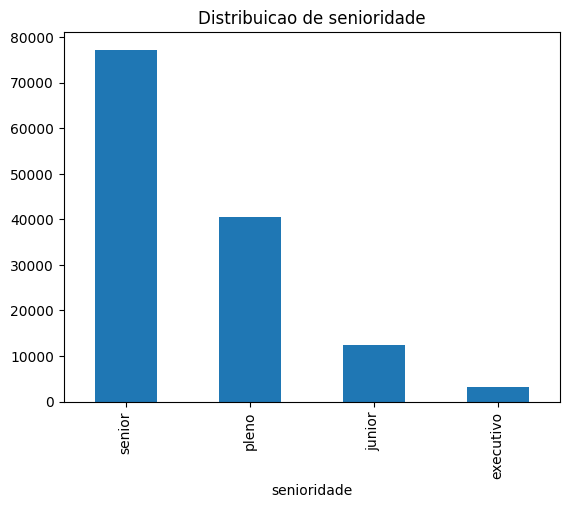

In [79]:
df_limpo.value_counts('senioridade').plot(kind='bar', title="Distribuicao de senioridade")
plt.show()

In [84]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

#por que sera que df_limpo.['usd'].mean().sort_values(ascending=False) nao funciona?


,usd
senioridade,
executivo,202027.667813
senior,172850.838301
pleno,143044.845979
junior,99034.963267


In [86]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index
ordem

Index(['junior', 'pleno', 'senior', 'executivo'], dtype='object', name='senioridade')

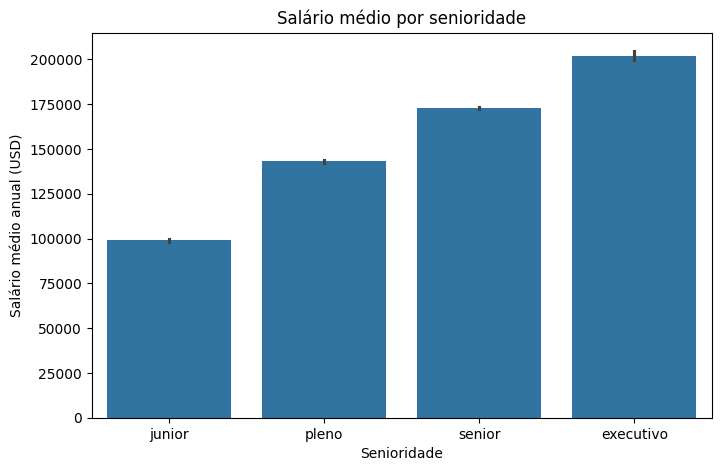

In [87]:

plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem)
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()


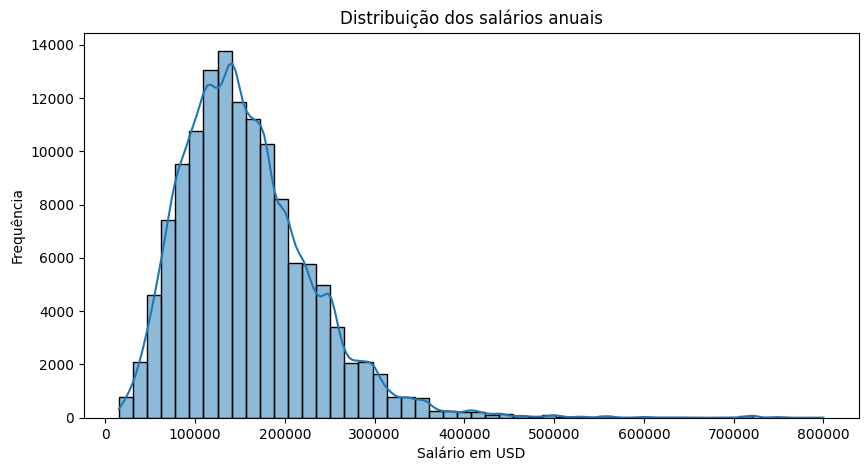

In [88]:
plt.figure(figsize=(10,5))
sns.histplot(df_limpo['usd'], bins = 50, kde=True)
plt.title("Distribuição dos salários anuais")
plt.xlabel("Salário em USD")
plt.ylabel("Frequência")
plt.show()


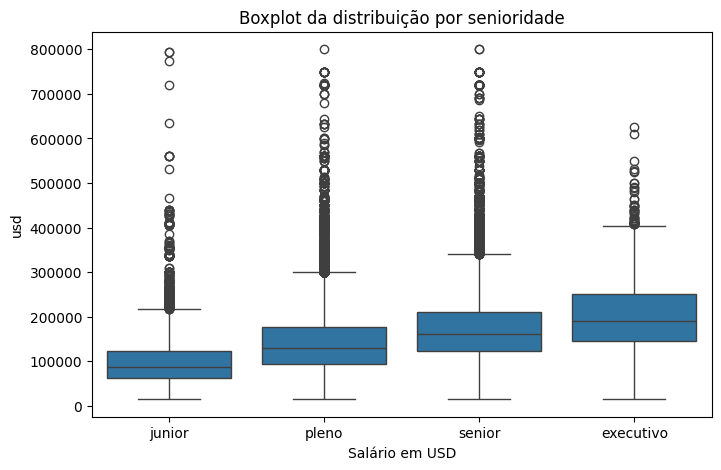

In [89]:

ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade)
plt.title("Boxplot da distribuição por senioridade")
plt.xlabel("Salário em USD")
plt.show()

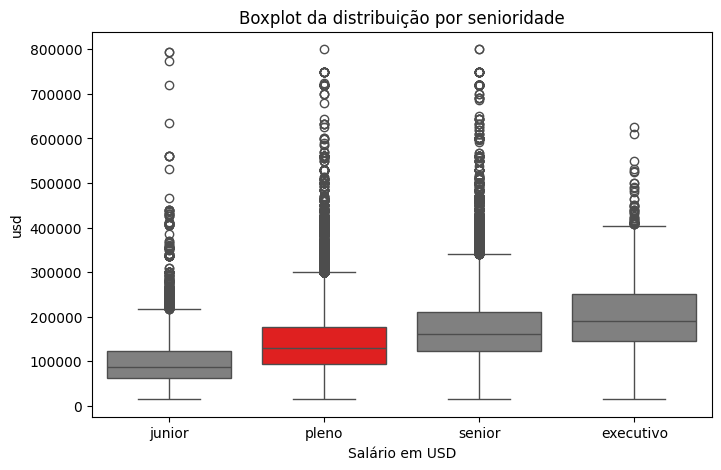

In [95]:
plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem, palette=['grey', 'red', 'grey','grey'], hue='senioridade')
plt.title("Boxplot da distribuição por senioridade")
plt.xlabel("Salário em USD")
plt.show()

In [96]:
import plotly.express as px

In [115]:
df_limpo.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa', 'salário_médio'],
      dtype='object')

In [140]:
df_data_scientists = df_limpo.query('cargo == "Data Scientist"')
ordem = df_data_scientists.groupby('residencia').usd.mean().sort_values(ascending=False).index #Extrai o atributo index

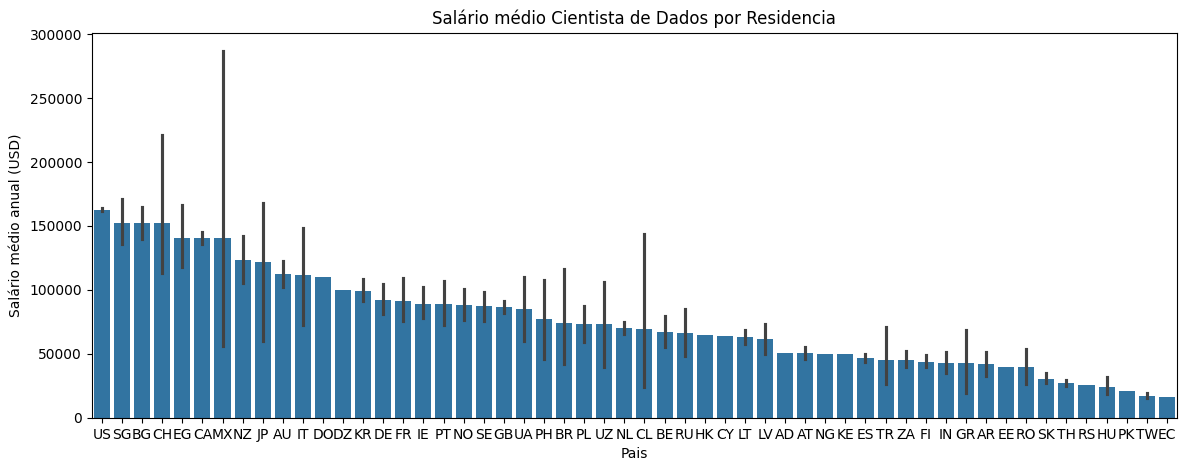

In [144]:
plt.figure(figsize=(14,5))
sns.barplot(data=df_data_scientists, x='residencia', y='usd', order=ordem)
plt.title("Salário médio Cientista de Dados por Residencia")
plt.xlabel("Pais")
plt.ylabel("Salário médio anual (USD)")
plt.show()

In [146]:
salario_medio_por_residencia = df_data_scientists.groupby('residencia')['usd'].mean().sort_values().reset_index()

fig = px.bar(salario_medio_por_residencia,
             x='residencia',
             y='usd',
             title='Salário Médio Anual (USD) para Cientistas de Dados por País de Residência')

fig.update_layout(xaxis_title='País de Residência', yaxis_title='Salário Médio Anual (USD)')

fig.show()

In [150]:
df_data_scientists['residencia'].unique()

array(['US', 'CA', 'GB', 'DE', 'FR', 'NL', 'IE', 'AT', 'AU', 'LT', 'PL',
       'ES', 'IN', 'SK', 'SE', 'MX', 'SG', 'NZ', 'KR', 'TR', 'BG', 'BR',
       'HU', 'TW', 'BE', 'IT', 'LV', 'EG', 'JP', 'CH', 'FI', 'AR', 'CL',
       'PT', 'KE', 'ZA', 'EE', 'UA', 'RO', 'PK', 'GR', 'PH', 'AD', 'EC',
       'NO', 'UZ', 'HK', 'TH', 'CY', 'DO', 'RU', 'DZ', 'NG', 'RS'],
      dtype=object)

In [153]:
#Cria o dicionario de paises
country_map = {
    'US': 'United States',
    'CA': 'Canada',
    'GB': 'United Kingdom',
    'DE': 'Germany',
    'FR': 'France',
    'NL': 'Netherlands',
    'IE': 'Ireland',
    'AT': 'Austria',
    'AU': 'Australia',
    'LT': 'Lithuania',
    'PL': 'Poland',
    'ES': 'Spain',
    'IN': 'India',
    'SK': 'Slovakia',
    'SE': 'Sweden',
    'MX': 'Mexico',
    'SG': 'Singapore',
    'NZ': 'New Zealand',
    'KR': 'South Korea',
    'TR': 'Turkey',
    'BG': 'Bulgaria',
    'BR': 'Brazil',
    'HU': 'Hungary',
    'TW': 'Taiwan',
    'BE': 'Belgium',
    'IT': 'Italy',
    'LV': 'Latvia',
    'EG': 'Egypt',
    'JP': 'Japan',
    'CH': 'Switzerland',
    'FI': 'Finland',
    'AR': 'Argentina',
    'CL': 'Chile',
    'PT': 'Portugal',
    'KE': 'Kenya',
    'ZA': 'South Africa',
    'EE': 'Estonia',
    'UA': 'Ukraine',
    'RO': 'Romania',
    'PK': 'Pakistan',
    'GR': 'Greece',
    'PH': 'Philippines',
    'AD': 'Andorra',
    'EC': 'Ecuador',
    'NO': 'Norway',
    'UZ': 'Uzbekistan',
    'HK': 'Hong Kong',
    'TH': 'Thailand',
    'CY': 'Cyprus',
    'DO': 'Dominican Republic',
    'RU': 'Russia',
    'DZ': 'Algeria',
    'NG': 'Nigeria',
    'RS': 'Serbia'
}


In [156]:
salario_medio_por_residencia['country_name'] = salario_medio_por_residencia['residencia'].map(country_map)

fig = px.choropleth(
    salario_medio_por_residencia,
    locations='country_name',
    locationmode='country names',
    color='usd',
    hover_name='country_name',
    color_continuous_scale=px.colors.sequential.Reds,
    title='Salário Médio Anual (USD) para Cientistas de Dados por País'
)
fig.update_layout(geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'))
fig.show()


In [107]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['remoto', 'contagem']
remoto_contagem

,remoto,contagem
0,Presencial,105305
1,Remoto,27716
2,Hibrido,318


In [114]:
fig = px.pie(remoto_contagem,
             values='contagem',
             names='remoto',
             title='Proporcao de tipos de trabalho',
             hole = 0.5)

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

In [ ]:
### Proximo desafio: Salario por pais em cientista de dados (Data Scientist) usando plotly
